

# <font face = 'calibri' color='red'>Vrush's analysis of the SNAP Reddit Data Set</font>
<p><font size = '4' face = 'calibri' color='black'>There is going to a be variety of different analysis including graph (network) analysis to find interesting behaviors of the people of Reddit. This dataset has a focus on the sentiment (whether it's well meaning or not) of the post  which is the thing that interested me. More of how this was determined could be found in the link below   </font></p>

  <p>To make the notebook look cleaner as of now I put the data extraction and imports on the bottom to reduce scrolling </p> 
  http://snap.stanford.edu/data/soc-RedditHyperlinks.html

## rank_activity(network (adjacency list)) 
Gets the most relevant subreddits with the most data in the adjacency list. I mostly made this function to get a refresher on how python dictionaries work since I've been doing a lot of cpp for school 


In [3]:
subs = rank_activity(network)[1]
subs_with_most_activity = subs[0 : 10]
data_t = "num_unique_words"# This decides what type of data to look for
body_t = True # This decides whether it looks at titles or the body of the post or title


In [4]:
df = make_dataframe(network, subs)
negative_posts = df.query('negative_sentiment == 1') 
positive_posts = df.query('negative_sentiment == 0')

/Users/vrushhabh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


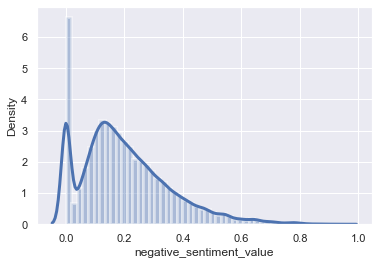

In [8]:
ax = sb.distplot(negative_posts.negative_sentiment_value, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})


# LIWC_tense relating to sentiment (logistic regression)

## Background 
* LIWC is a text parser that categorizes words into many different things relating to many different topics such as a percentage of the text. A full list of the categories used on this data set could be found here below. Many academic papers use this so it is atleast somewhat a reliable categorizer
    * http://snap.stanford.edu/data/soc-RedditHyperlinks.html
* A plot on one in the y axis on the 3 plots below would represent a post with negative sentiment and a 0 would represent a neutral or positive post according to the sentiment analysis of the people who made the data set.

## Findings

* One of these regression plots by themselves would give decent insight but all three together give a better insight and knowing the period of time in which this data set was gathered gives even MORE insight (2014 - 2017)

### LIWC_present  
    
   * Redditors seem to be more negative as more of their post discusses present events (as determined by LIWC) 
   * The negative things also tend to get most of the press because they get more clicks (more revenue). Since it gets more attention people might post about it more since they hear about it from the news or other more relevant media.  
   * The 2016 US election could be a big reason for this since me as a highschool freshmen back then remember there being many negative headlines and just overall negative sentiment from social media. And many people do get pretty aggressive and emotional (to an unhealthy unextent) when it comes to their politcal standings so I would not be suprised
        
        
### LIWC_past 
    
   * There seems to be a correlation to positive or neutral sentiment if more words in a post have to do with the past when ever the LWIC value is is over .15 (a lot of the posts have values less than .15 which seems like bad data since some words revolving around the past could be used but not be the focus of the post)
   * I thought personally thought it would correlate with positive sentiment due to nostalgia and because of older individuals always talking about the good ol' days.
        * I might do LIWC analysis with VADER values (linear regression instead of logistic) on the Y which is a continuous and not binary like the assigned sentiment but that is repititive in nature so maybe not.
    
### LIWC_future 
    
   * Again there seems to be a postive correlation.
   * I often see people being scared about AI taking over jobs in the future so I expected negative sentiment but new technology is pretty exciting and reddit users tend to be more on the nerdier side than the general population so it somehwhat makes sense. 
        
   
     
    
    
   
 

<IPython.core.display.Javascript object>


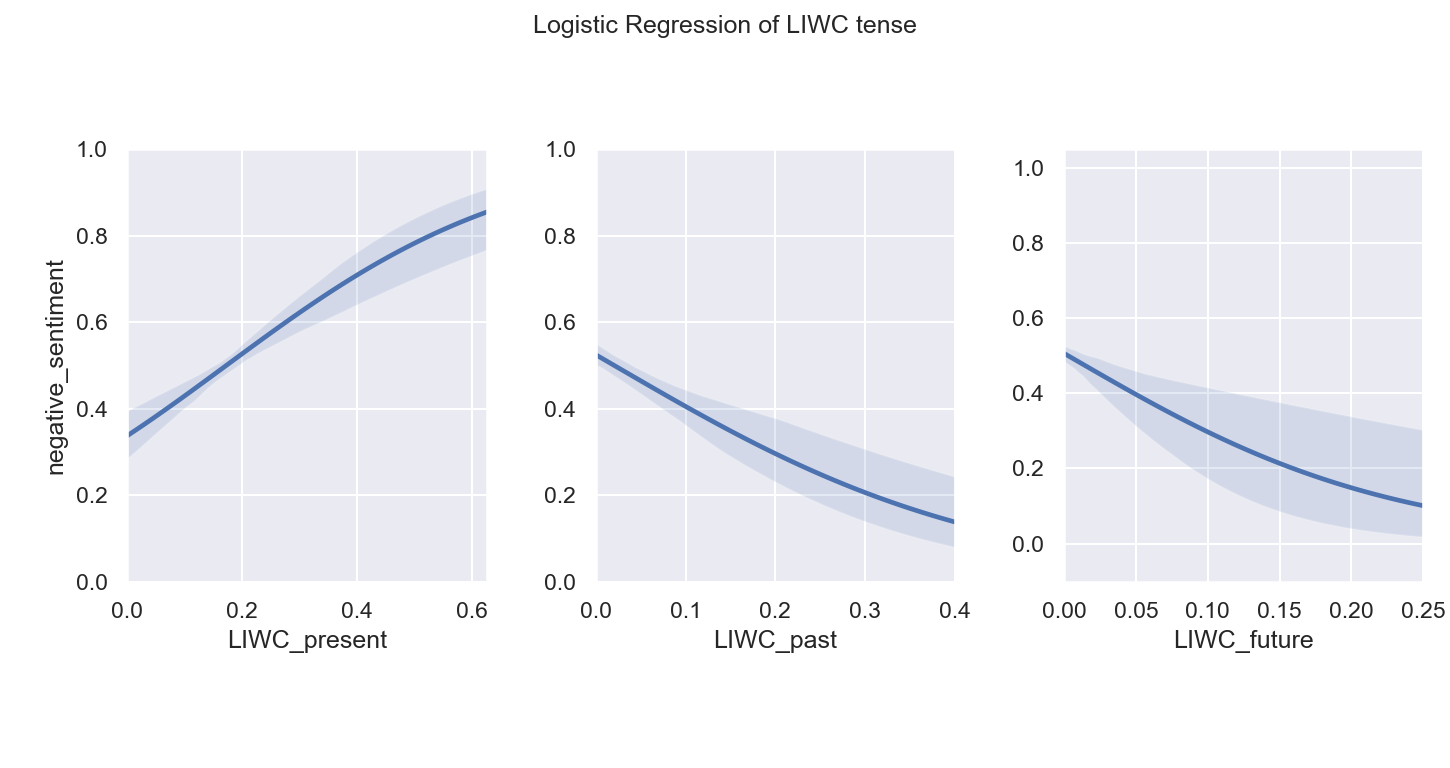

In [12]:
%matplotlib notebook
q = "LIWC_present > .15 or LIWC_past > .15 or LIWC_future > .15"
# getting a equal amount of both samples to get more accurate information relating to following analysis
sample = pd.concat([negative_posts.query(q).sample(1000), positive_posts.query(q).sample(1000)]) 
# There is alot of data so more samples are needed to get a more accurate picture with tighter confidence interval bounds

f = plt.figure(figsize=(8, 2.6))
gs = f.add_gridspec(1, 3)


ax1 = f.add_subplot(gs[0, 0])
ax1 = sb.regplot(x="LIWC_present", y="negative_sentiment", data= sample,
                logistic=True,  y_jitter=.05, n_boot = 100, scatter = False)
ax1.set(ylim=(0, 1))

ax2 = f.add_subplot(gs[0, 1])
ax2 = sb.regplot(x="LIWC_past", y="negative_sentiment", data= sample,
                logistic=True,  y_jitter=.03,n_boot = 100, scatter = False)
ax2.set(ylabel = None, ylim=(0, 1))


ax3 = f.add_subplot(gs[0, 2])
ax3 = sb.regplot(x="LIWC_future", y="negative_sentiment", data= sample,
                logistic=True,  y_jitter=.03,n_boot = 100, scatter = False)
ax3.set(ylabel = None, ylim=(0, 1))


plt.ylim(-.102, 1.05)
f.suptitle("Logistic Regression of LIWC tense")
f.tight_layout()

# LIWC_forbidden_topics relating to sentiment

## Background 
* The forbidden topics are often the ones that are often frowned to discuss upon at the dinner table which are money, sex, and religion. We are going to be trying to gather some insight on what redditers think about the topics and to what degree. 
* To give a general idea of each of the sub categories I made a bar graph showing the amount of posts in each categories and what sentiments they belong to (religion and sex have more proportion posts consisting of negative sentiment). You can also see that posts are also mostly exlusive to one category so they are not that correlated to each other.

## Regression Analysis
* There seems to be a positive correlation with the topics and negative sentiment and negative correlation with positive sentiment. The odd posts with the negative posts having a 0 negative sentiment value bring down the correlation (makes sense since the categorization of the VADER value at 0 probably did not factor into actually marking the post as negative (maybe the creators of this dataset used nlp or some other method to count in all the factors)

* The topics also have a lower average of positive sentiment value

   

<IPython.core.display.Javascript object>


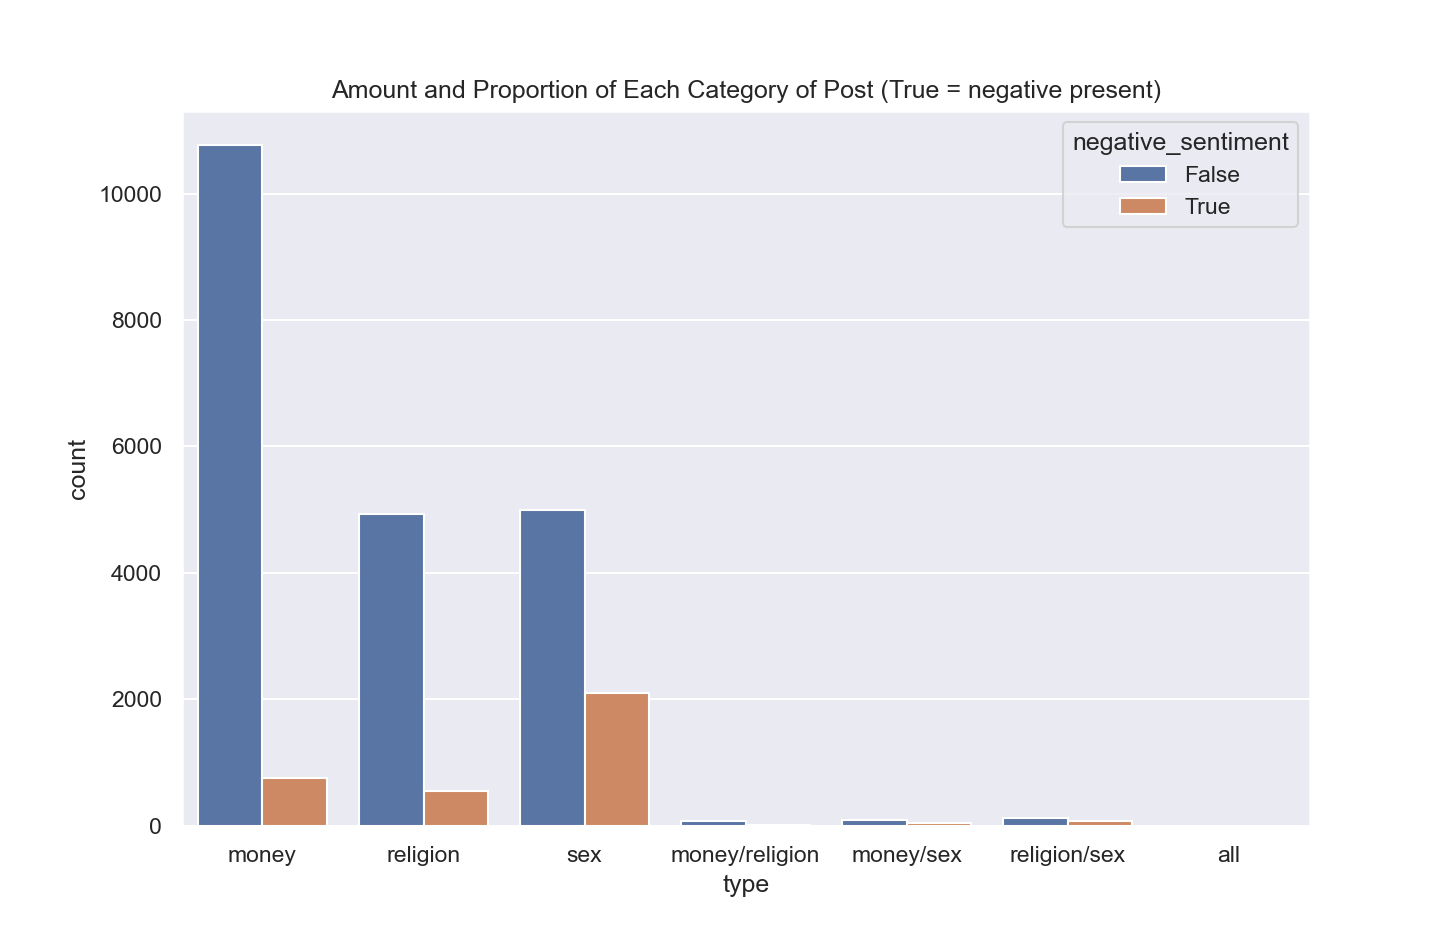

In [13]:
threshold = .10
q = "LIWC_money > @threshold and LIWC_relig < @threshold and LIWC_sex < @threshold" # posts with focus on money
money_sample = df.query(q)

q= "LIWC_money < @threshold and LIWC_relig > @threshold and LIWC_sex < @threshold" # posts with religion as focus
relig_sample = df.query(q)

q= "LIWC_money < @threshold and LIWC_relig < @threshold and LIWC_sex > @threshold" # posts with sex as focus
sex_sample = df.query(q)

q = "LIWC_money > @threshold and LIWC_relig > @threshold and LIWC_sex < @threshold" # posts with money and religion as focus
money_reli_sample = df.query(q)

q= "LIWC_money > @threshold and LIWC_relig < @threshold and LIWC_sex >@threshold" # posts with money and sex as focus
money_sex_sample = df.query(q)

q= "LIWC_money < @threshold and LIWC_relig > @threshold and LIWC_sex > @threshold" # posts with religion and sex as focus
relig_sex_sample = df.query(q)

q= "LIWC_money > @threshold and LIWC_relig > @threshold and LIWC_sex > @threshold" # posts with all three subjects being of focus
all_sample = df.query(q)

type_ = ["money"] * len(money_sample) + ["religion"] * len(relig_sample) + ["sex"] * len(sex_sample)
type_ += ["money/religion"] * len(money_reli_sample) + ["money/sex"] * len(money_sex_sample) + ["religion/sex"] * len(relig_sex_sample) + ["all"] * len(all_sample)


forbidden_df = pd.concat([money_sample, relig_sample, sex_sample, money_reli_sample, money_sex_sample, relig_sex_sample, all_sample])
forbidden_df["type"] = type_
fig = sb.countplot( x = "type",hue = "negative_sentiment" ,data = forbidden_df).set(title ="Amount and Proportion of Each Category of Post (True = negative present)" )



<IPython.core.display.Javascript object>


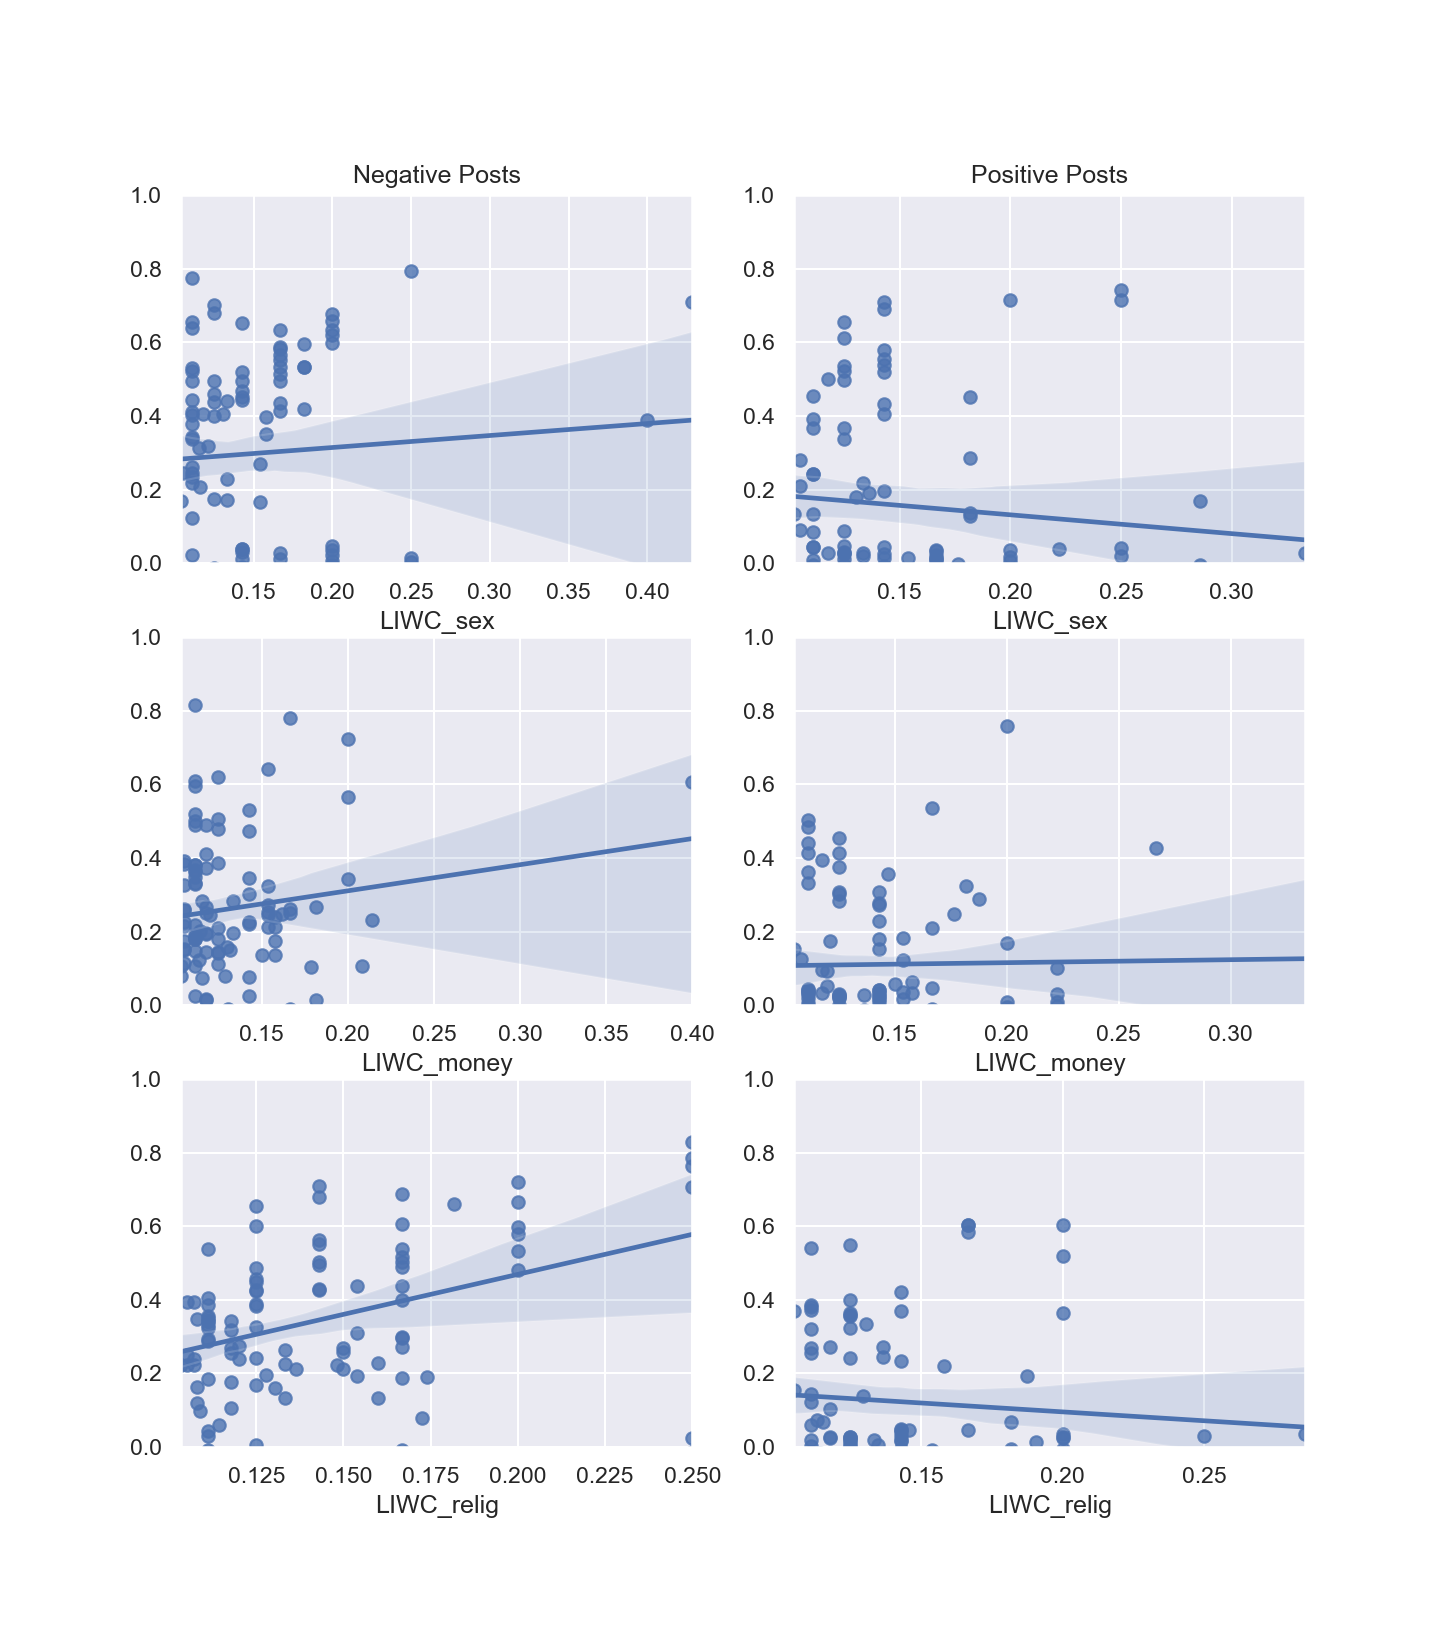

Text(0.5, 1.0, 'Positive Posts')

In [33]:
f = plt.figure(figsize=(8, 2.6))
gs = f.add_gridspec(3, 2)

ax1 = f.add_subplot(gs[0, 0])
ax1 = sb.regplot(x="LIWC_sex", y="negative_sentiment_value", data= sex_sample.query("negative_sentiment == 1").sample(100),
                y_jitter=.05, n_boot = 100)
ax1.set(ylabel = None,ylim=(0, 1))


ax2 = f.add_subplot(gs[0, 1])
ax2 = sb.regplot(x="LIWC_sex", y="positive_sentiment_value", data= sex_sample.query("negative_sentiment == 0").sample(100),
                y_jitter=.05, n_boot = 100)#.set_title("Positive Posts")
ax2.set(ylabel = None,ylim=(0, 1))

ax3 = f.add_subplot(gs[1, 0]) 
ax3 = sb.regplot(x="LIWC_money", y="negative_sentiment_value", data= money_sample.query("negative_sentiment == 1").sample(100),
                y_jitter=.03,n_boot = 100)
ax3.set(ylabel = None, ylim=(0, 1))

ax4 = f.add_subplot(gs[1, 1])
ax4 = sb.regplot(x="LIWC_money", y="positive_sentiment_value", data= money_sample.query("negative_sentiment == 0").sample(100),
                y_jitter=.05,n_boot = 100)
ax4.set(ylabel = None, ylim=(0, 1))

ax5 = f.add_subplot(gs[2, 0])
ax5 = sb.regplot(x="LIWC_relig", y="negative_sentiment_value", data= relig_sample.query("negative_sentiment == 1").sample(100),
                y_jitter=.05,n_boot = 100)
ax5.set(ylabel = None, ylim=(0, 1))

ax6 = f.add_subplot(gs[2, 1])
ax6 = sb.regplot(x="LIWC_relig", y="positive_sentiment_value", data= relig_sample.query("negative_sentiment == 0").sample(100),
                y_jitter=.05,n_boot = 100)
ax6.set(ylabel = None, ylim=(0, 1))
ax1.set_title("Negative Posts")
ax2.set_title("Positive Posts")







In [2]:
mega_network = RedditNetwork()
#first make network from hyperlink from bodies of posts
mega_network\
    .make_network("/Users/vrushhabh/PycharmProjects/subreddit-conflict-graph-analyzer/soc-redditHyperlinks-body1.tsv")

#second grow network from hyperlinks from titles of posts
mega_network\
    .make_network("/Users/vrushhabh/PycharmProjects/subreddit-conflict-graph-analyzer/soc-redditHyperlinks-title.tsv"
                  ,False)
network = mega_network.get_network() #get the adjacency list

In [1]:
import sys
import jupyterthemes #the themes do not really look that good 
from jupyterthemes import jtplot
sys.path.append('../')
from reddit_network import RedditNetwork 
from network_analyzer import * 
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import seaborn as sb
import random
import numpy as np
sb.set_theme()